# Házi feladat

A gyakorlaton látott ,,Conway Game of Life" automatához sok kezdő
mintázat érhető el az alábbi címen:
<https://www.conwaylife.com/patterns/>. A mintázatok egyrészt `.rle`
másrészt `.cells` formátumban érhetőek el.

A `.rle` formátum leírása megtalálható a
<https://www.conwaylife.com/wiki/Run_Length_Encoded> oldalon, míg
`.cells` formátum leírása a <https://www.conwaylife.com/wiki/Plaintext>
címen.

Írjunk két függvényt.

1.  Az első bemenetként kap egy sztringet ami `.rle` formátumban
    tartalmazza a mintát és kiszámolja a mintázatot, amit `numpy`
    tömbként ad vissza.

2.  A második függvény ugyanezt csinálja, de most a bemenet egy `.cells`
    formátumú sztring.

Tesztelésként ugyanannak a mintázatnak mindkét alakját töltsök le és
ellenőrizzük (a letöltést pythonból oldjuk meg, a kód szerepeljen a
beadott munkafüzetben), hogy a két függvény ugyanazt az eredményt adja-e
vissza. Néhány mintázatnál jelenítsük meg a mintázatot a `matplotlib`
könytár segítségével és vessük össze a `.cells` formátum printelt
változatával.

Emlékeztetőül file-t letölteni pl. az `urllib.request` modul
segítségével lehet.

Néhány mintázat címe:
```text
    urls = [
      "https://www.conwaylife.com/patterns/3enginecordership.rle",
      # "https://www.conwaylife.com/patterns/3enginecordership.cells",
      "https://conwaylife.com/patterns/3c7wave.rle"
      # "https://conwaylife.com/patterns/3c7wave.rle",
      "https://conwaylife.com/patterns/44p7.2.rle",
      # "https://conwaylife.com/patterns/44p7.2.cells",
      "https://conwaylife.com/patterns/zebrastripes.rle",
      # "https://conwaylife.com/patterns/zebrastripes.cells",
    ]
```

In [1]:
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.conwaylife.com/patterns/"

def download_pattern(pattern, format="cells"):
    url = f"{base_url}{pattern}.{format}"
    try:
        with request.urlopen(url) as response:
            return response.read().decode("utf-8")
    except:
        return None

In [3]:

cell = download_pattern("44p7.2") 
rle = download_pattern("44p7.2", "rle")
print(cell)
print(rle)

!Name: 44P7.2
!Author: David Buckingham
!A period 7 oscillator that supplies two accessible domino sparks, discovered on June 19, 1977
!www.conwaylife.com/wiki/index.php?title=44P7.2
...........O
..........O.O
..........O.O
.........OO.O.OO
............OO.O
........O.OO
...........O
........OOO
.....O.O
...O...O.OO
.OOO.O.O.OO
O....OO
.OOOO
....O
...O
...OO

#N 44P7.2
#O David Buckingham
#C A period 7 oscillator that supplies two accessible domino sparks, discovered on June 19, 1977
#C www.conwaylife.com/wiki/index.php?title=44P7.2
x = 16, y = 16, rule = b3/s23
11bo4b$10bobo3b$10bobo3b$9b2obob2o$12b2obo$8bob2o4b$11bo4b$8b3o5b$5bob
o8b$3bo3bob2o5b$b3obobob2o5b$o4b2o9b$b4o11b$4bo11b$3bo12b$3b2o!


In [4]:
def drop_comments(text, comment_char):
    """removes the lines starting with comment_char"""
    return "\n".join([line for line in text.splitlines() if not line.startswith(comment_char)])

def decode_cells(text):
    text = drop_comments(text, "!")
    lines = text.splitlines()
    board_shape = len(lines), max(map(len, lines))
    board = np.zeros(board_shape, dtype=np.uint8)
    for line, board_line in zip(lines, board):
        board_line[:len(line)] = [1 if char == "O" else 0 for char in line]
    return board


...........O
..........O.O
..........O.O
.........OO.O.OO
............OO.O
........O.OO
...........O
........OOO
.....O.O
...O...O.OO
.OOO.O.O.OO
O....OO
.OOOO
....O
...O
...OO


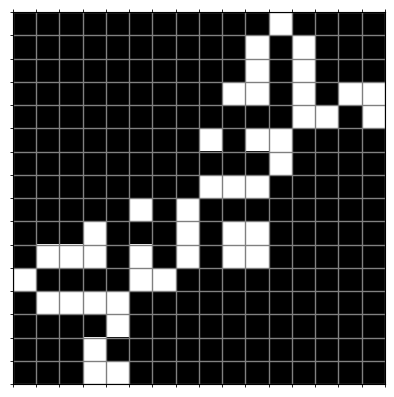

In [5]:
print(drop_comments(cell, "!"))
board = decode_cells(cell)
h, w = board.shape
plt.matshow(board, cmap="gray", vmin=0, vmax=1)
plt.xticks(np.arange(w+1)-.5, minor=True)
plt.xticks([])
plt.yticks(np.arange(h+1)-.5, minor=True)
plt.yticks([])
plt.grid(which="minor", color="gray", linestyle='-', linewidth=1)
plt.axis()
plt.grid()

In [6]:
def plot_board(board):
    h, w = board.shape
    plt.matshow(board, cmap="Pastel1_r", vmin=0, vmax=1)
    plt.xticks(np.arange(w+1)-.5, minor=True)
    plt.xticks([])
    plt.yticks(np.arange(h+1)-.5, minor=True)
    plt.yticks([])
    plt.grid(which="minor", color="gray", linestyle='-', linewidth=1)
    

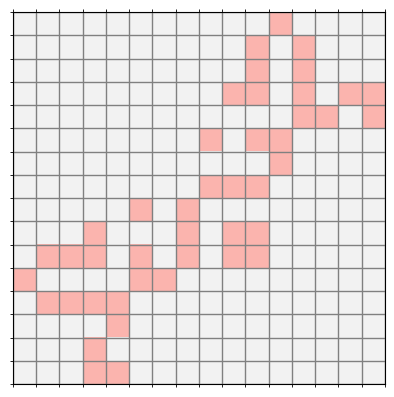

In [7]:
plot_board(board)

In [8]:
def rle_decode(text, active_chars="ob$"):
    num = 0
    for char in text:
        if char == "!":
            break
        elif char.isdigit():
            num = num * 10 + int(char)
        elif char in active_chars:
            yield  (num if num > 0 else 1), char
            num = 0

def get_shape_body(text):
    text = drop_comments(text, "#")
    header, body = text.split("\n", maxsplit=1)
    x, y, rule = header.split(",")
    w = int(x.split("=")[1])
    h = int(y.split("=")[1])
    return (h, w), body

def decode_rle(text):
    shape, body = get_shape_body(text)
    board = np.zeros(shape, dtype=np.uint8)
    i, j = 0, 0
    for num, char in rle_decode(body):
        if char == "b":
            j += num
        elif char == "o":
            board[i, j:j+num] = 1
            j += num
        elif char == "$":
            i += num
            j = 0
    return board

In [9]:
shape, body = get_shape_body(rle)
shape, body


((16, 16),
 '11bo4b$10bobo3b$10bobo3b$9b2obob2o$12b2obo$8bob2o4b$11bo4b$8b3o5b$5bob\no8b$3bo3bob2o5b$b3obobob2o5b$o4b2o9b$b4o11b$4bo11b$3bo12b$3b2o!')

In [10]:
[*rle_decode(body)]

[(11, 'b'),
 (1, 'o'),
 (4, 'b'),
 (1, '$'),
 (10, 'b'),
 (1, 'o'),
 (1, 'b'),
 (1, 'o'),
 (3, 'b'),
 (1, '$'),
 (10, 'b'),
 (1, 'o'),
 (1, 'b'),
 (1, 'o'),
 (3, 'b'),
 (1, '$'),
 (9, 'b'),
 (2, 'o'),
 (1, 'b'),
 (1, 'o'),
 (1, 'b'),
 (2, 'o'),
 (1, '$'),
 (12, 'b'),
 (2, 'o'),
 (1, 'b'),
 (1, 'o'),
 (1, '$'),
 (8, 'b'),
 (1, 'o'),
 (1, 'b'),
 (2, 'o'),
 (4, 'b'),
 (1, '$'),
 (11, 'b'),
 (1, 'o'),
 (4, 'b'),
 (1, '$'),
 (8, 'b'),
 (3, 'o'),
 (5, 'b'),
 (1, '$'),
 (5, 'b'),
 (1, 'o'),
 (1, 'b'),
 (1, 'o'),
 (8, 'b'),
 (1, '$'),
 (3, 'b'),
 (1, 'o'),
 (3, 'b'),
 (1, 'o'),
 (1, 'b'),
 (2, 'o'),
 (5, 'b'),
 (1, '$'),
 (1, 'b'),
 (3, 'o'),
 (1, 'b'),
 (1, 'o'),
 (1, 'b'),
 (1, 'o'),
 (1, 'b'),
 (2, 'o'),
 (5, 'b'),
 (1, '$'),
 (1, 'o'),
 (4, 'b'),
 (2, 'o'),
 (9, 'b'),
 (1, '$'),
 (1, 'b'),
 (4, 'o'),
 (11, 'b'),
 (1, '$'),
 (4, 'b'),
 (1, 'o'),
 (11, 'b'),
 (1, '$'),
 (3, 'b'),
 (1, 'o'),
 (12, 'b'),
 (1, '$'),
 (3, 'b'),
 (2, 'o')]

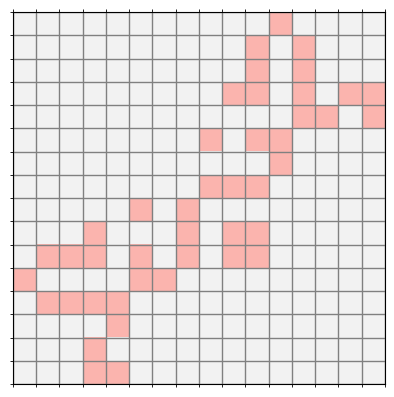

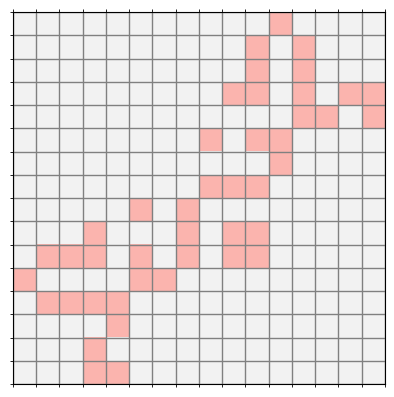

In [11]:
plot_board(decode_rle(rle))
plot_board(decode_cells(cell))

In [12]:
import re

In [13]:
def rle_decode(text):
    for m in re.finditer(r"(\d+)?([ob$])", text):
        num = int(m.group(1)) if m.group(1) else 1
        char = m.group(2)
        yield num, char


In [14]:

[*rle_decode("3o$2b3o!")]

[(3, 'o'), (1, '$'), (2, 'b'), (3, 'o')]

### Le tudjuk-e kérdezni az összes mintát.


In [ ]:
with request.urlopen(base_url) as response:
    html = response.read().decode("utf-8")

In [32]:
print(f"html size: {len(html):_} bytes")

html size: 2_203_162 bytes


In [ ]:
import bs4 as bs

soup = bs.BeautifulSoup(html, "html.parser")

In [44]:
soup.body

<body><div class="content"><h1 style="color: #555;">Index of /patterns/</h1>
<div id="table-filter"><input id="filter-keyword" name="keyword" placeholder="Filter Name" type="text"/></div>
<div id="table-list"><table id="table-content"><thead class="t-header"><tr><th aria-sort="ascending" class="colname"><a "="" class="name" href="?ND" onclick="return false">Name</a></th><th class="colname" data-sort-method="number"><a "="" href="?MA" onclick="return false">Last Modified</a></th><th class="colname" data-sort-method="number"><a "="" href="?SA" onclick="return false">Size</a></th></tr></thead>
<tr data-sort-method="none"><td><a href="/"><img alt="Up" class="icon" src="/_autoindex/assets/icons/corner-left-up.svg"/>Parent Directory</a></td><td></td><td></td></tr>
<tr><td data-sort="101.cells"><a href="/patterns/101.cells"><img alt="File" class="icon" src="/_autoindex/assets/icons/file.svg"/>101.cells</a></td><td data-sort="1571237984">2019-10-16 14:59</td><td data-sort="435">      1k</td></

In [55]:
print(soup.body.text[:300])

Index of /patterns/

NameLast ModifiedSize
Parent Directory
101.cells2019-10-16 14:59      1k
101.rle2011-05-18 20:50      1k
103p4h1v0.cells2022-03-02 03:45      1k
103p4h1v0.rle2022-03-01 03:23      1k
103p69.cells2023-06-03 01:51      1k
103p69.rle2023-06-03 00:34      1k
104p177.cells2021-06-03 


In [45]:
patterns = [atag.attrs["href"] for tr_row in soup.css.select("tr [data-sort]") if (atag := tr_row.find("a"))]

In [46]:
len(patterns)

8207

In [47]:
patterns[:5]

['/patterns/101.cells',
 '/patterns/101.rle',
 '/patterns/103p4h1v0.cells',
 '/patterns/103p4h1v0.rle',
 '/patterns/103p69.cells']

## A világ népessége

In [1]:
import kagglehub
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/world-population-dataset")

print("Path to dataset files:", path)
print(*Path(path).glob("*"), sep="\n")
csv_file = next(iter(Path(path).glob("*.csv")))

Path to dataset files: /home/prokaj/.cache/kagglehub/datasets/iamsouravbanerjee/world-population-dataset/versions/4
/home/prokaj/.cache/kagglehub/datasets/iamsouravbanerjee/world-population-dataset/versions/4/world_population.csv


In [3]:
df = pd.read_csv(csv_file)

In [4]:
df.shape

(234, 17)

In [5]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [7]:
df.columns = df.columns.str.removesuffix(" Population")
df.columns = df.columns.str.removesuffix("/Territory")
df = df.rename(columns=lambda x: x.split(" (")[0])
df.columns 


Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022', '2020',
       '2015', '2010', '2000', '1990', '1980', '1970', 'Area', 'Density',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [8]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area,Density,Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


Válasozljuk meg az alábbi kérdéseket:

* Melyik ország lakossága növekedett a legnagyobb mértékben 1970 és 2022 között?

* Melyik ország lakossága csökkent a legnagyobb mértékben 1970 és 2022 között?

* Földrészenként melyik a legnépesebb ország?

* A világ népességének mi a százalékos megoszlása földrészenként?

* Számoljuk ki a földrészek népességét, minden évre amire adatunk van.

#### A földrészek népességének változása 1970-től 2022-ig

In [ ]:
grouped = df.groupby(["Continent"])
years = ["1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022"]
df_contient_populations = grouped[years].sum()
df_contient_populations

### Széles formátum

In [ ]:
df_contient_populations

### Hosszú formátum

In [ ]:
df_long = df.melt(
    id_vars=["Continent", "Country"], #, "Rank", "World Population Percentage", "Area", "Growth Rate", "Density"], 
    value_vars=years, 
    var_name="Year", 
    value_name="Population"
)
df_long

- Szélesből hosszú formátumba  a `melt` metódussal,

- Hosszúból szélesbe a `pivot` metódussal

válthatunk

In [ ]:
df_wide = df_long.pivot(index=["Country", "Continent"], columns="Year", values="Population")
# df_wide

In [ ]:
df_wide.columns.name = None
df_wide = df_wide.reset_index()
df_wide

In [ ]:
pop_by_year = df_long.pivot_table(index="Year", columns="Continent", values="Population", aggfunc="sum")
pop_by_year

In [ ]:
pop_by_year.index = pd.to_datetime(pop_by_year.index, format="%Y").year
pop_by_year.index

# Egy gráfelméleti algoritmus

## Feladat

Adott egy `n` csúcsú irányítatlan gráf az élek listájával. A gráf csúcsait `0`-tól `n-1`-ig címkéztük meg, az éleket pedig a végpontokkal.

Emellett adott egy kiindulási pont és egy végpont. Azt szeretnénk eldönteni, hogy el lehet-e jutni a kiindulási pontból a végpontba a gráf éleit használva.

Gondolhatunk arra, hogy a gráf egy úthálózatot ír le és a kérdés az, hogy el tudunk-e jutni `A`-ból `B`-be.

Pl. `n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

Gráfok megjelenítésére egy hasznos könyvtár a `graphviz`.

In [ ]:
import importlib
if importlib.util.find_spec('graphviz') is None:
    ! pip install graphviz
import graphviz

In [ ]:
edges = [[0,1], [1,2], [2,0]]
g0 = graphviz.Graph()

g0.edges([(str(a), str(b)) for a, b in edges])
g0

A gráf összefüggő, tetszőleges `A`, `B` esetén a válasz: `True`

In [ ]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

g1 = graphviz.Graph()
g1.edges([(str(a), str(b)) for a, b in edges])
g1

Nincs út 0 és 5 között. A válasz: `False`

Összefüggőségi komponenseket szeretnénk számolni.



## Ötlet.

Az él nélküli gráfból indulunk ki. Itt egy elemű komponensek vannak.

Minden komponensből válasszunk egy reprezentáns és minden $i$ pontra feljegyezzük, melyik komponensben van.




In [ ]:
def show_graph(roots, direction = 'LR'):
    g = graphviz.Digraph(graph_attr={'rankdir': direction})
    g.edges((str(i), str(r)) for i, r in enumerate(roots))
    return g

In [ ]:
n = 5
roots = [i for i in range(n)]
display(show_graph(roots, 'TD'))

ha behúzzuk a $(0, 1)$ élet, akkor $0$ és $1$ azonos komponensbe kerül. Választhatunk a két összeuniózott komponens reprezentánsa között, legyen pl. 1

In [ ]:
roots[0] = 1
display(show_graph(roots, 'TD'))

Ha most a (0, 2) élet akarjuk behúzni, akkor nem állíthatjuk át `roots[0]`. Meg kell keresnünk `0` komponensének reprezentását, ez 1 és vagy `roots[1]`-et állítjuk 2 -re, vagy `roots[2]`-t 1-re.

In [ ]:
def find(roots, a):
    while a != roots[a]:
        a = roots[a]
    return a

In [ ]:
find(roots, 0), find(roots, 2)

In [ ]:
def union(roots, a, b):
    ra = find(roots, a)
    rb = find(roots, b)
    roots[ra] = rb

In [ ]:
union(roots, 0, 2)
print(f"After union(0, 2) {roots=}")
display(show_graph(roots))

union(roots, 3, 4)
print(f"After union(3, 4) {roots=}")
print(roots)
display(show_graph(roots))

union(roots, 3, 2)
print(f"After union(3, 2) {roots=}")
print(roots)
display(show_graph(roots))

Ezután az a kérdés, hogy el lehet-e jutni `A`-ból, `B`-be könnyen eldönthető. Ha `A` és `B` azonos komponensben van, akkor `A` és `B` között megy út az eredeti gráfban, különben nem.

1. példa
`n = 3`, élek `edges = [[0,1], [1,2], [2,0]]`, `A =  0`, `B = 2`.

In [ ]:
def show_edges(edges, direction='LR'):
    g = graphviz.Graph(graph_attr={'rankdir': direction})
    g.edges([(str(a), str(b)) for a, b in edges])
    return g

In [ ]:
n = 3
edges = [[0,1], [1,2], [2,0]]
A =  0
B = 2

display(show_edges(edges, 'TD'))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")

2. példa

In [ ]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
A = 0
B = 5

display(show_edges(edges))
print(f"Eredeti gráf")
print("="*50)

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))
print(f"{A=} és {B=} {'azonos' if find(roots, A)==find(roots, B) else 'különböző'} komponensben van")


Mi történik, ha nagyobb gráfunk van?

In [ ]:
n = 10
edges = [(0,i+1) for i in range(n-1)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
for a, b in edges:
    union(roots, a, b)

display(show_graph(roots))


Valahányszor behúzzuk a $(0, i)$ élet, meg kell keresni $0$ reprezentánsát. $k$ él behúzása után $k$-lépéssel találjuk meg. Ha 10 helyett 10_000 méretű a gráf ez nem fog működni.

### Javítási lehetőségek.

- Amikor megkeressük $i$ reprezentánsát végig megyünk a reprezentánshoz vezető úton. Minden meglátogatott csúcsra ismerté válik a reprezentáns értéke. Ezt beírhatjuk a `roots` tömbe. (path compression)

- A nagyobb komponensbe kössük be a kisebbet és ne fordítva. Ehhez  a ,,méretet'' nyilván kell tartani.

In [ ]:
def find_better(roots, a):
    ra = roots[a]
    if a != ra:
        ra = find_better(roots, ra)
        roots[a] = ra
    return ra

def find_better_without_recursion(roots, a):
    stack = []

    ra = roots[a]
    while a != ra:
        stack.append(a)
        a = ra
        ra = roots[a]

    while stack:
        roots[stack.pop()] = ra

    return ra


def union_sizes(roots, sizes, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if sizes[ra] < sizes[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        sizes[ra] += sizes[rb]

def union_ranks(roots, ranks, a, b):
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    if ra != rb:
        if ranks[ra] < ranks[rb]:
            ra, rb = rb, ra
        roots[rb] = ra
        if ranks[ra] == ranks[rb]:
            ranks[ra] += 1




In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[ra] = rb

display(show_graph(roots, 'LR'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]

for a, b in edges:
    ra = find_better(roots, a)
    rb = find_better(roots, b)
    roots[rb] = ra

display(show_graph(roots, 'TD'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
sizes = [1]*n

for a, b in edges:
    union_sizes(roots, sizes, a, b)

display(show_graph(roots, 'TD'))


In [ ]:
n = 10
edges = [(0, i) for i in range(1, n)]
display(show_edges(edges, 'TD'))

roots = [i for i in range(n)]
ranks = [0]*n

for a, b in edges:
    union_ranks(roots, ranks, a, b)

display(show_graph(roots, 'TD'))


### Szokásos implementáció

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.roots = [i for i in range(n)]
        self.sizes = [1]*n

    def find(self, a):
        ra = self.roots[a]
        if a != ra:
            ra = self.find( ra)
            self.roots[a] = ra
        return ra

    def union(self, a, b):
        ra = self.find(a)
        rb = self.find(b)
        if ra != rb:
            if self.sizes[ra] < self.sizes[rb]:
                ra, rb = rb, ra
            self.roots[rb] = ra
            self.sizes[ra] += self.sizes[rb]


In [ ]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

`__str__` és `__repr__` metódusok

In [ ]:
def as_set(seq):
    return f"{{{', '.join(map(str, seq))}}}"

def uf_str(self):
    components = {}
    for a in range(len(self.roots)):
        ra = self.find(a)
        if ra not in components:
            components[ra] = []
        components[ra].append(a)
    return f"{{{ ', '.join(map(as_set, components.values()))}}}"

def uf_repr(self):
    return f"{type(self).__name__}({len(self.roots)})"

# Így is lehet:
UnionFind.__str__ = uf_str
UnionFind.__repr__ = uf_repr

In [ ]:
uf = UnionFind(10)
print(uf)
uf.union(1, 2)
print(uf)
uf.union(5, 9)
uf.union(6, 7)
print(uf)

uf

### További kérdések

- Tegyük fel, hogy a komponensek száma érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Tegyük fel, hogy a legnagyobb komponens méretet érdekel minket. Hogyan oldanánk, meg, hogy konstans idő alatt megkaphassuk.
- Hogyan ellenőriznénk, hogy két partíció azonos?

## Kérdések

1. Hogyan oldanánk meg Sudoku feladványokat?
2. Hogyan keresnénk legrövidebb utat egy gráfban két pont között?
3. Adva van egy tanmenet. Minden tárgynak lehetnek előfeltételei. Hogyan számolnánk ki, hogy hány félév alatt teljesíthető az összes óra? Korlátlan számú tárgyat végezhetünk egy félévben.